In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from calcul_structure import *

In [2]:
## Propriété materiaux [N, m]
E = 1
I = 1
A = 1

#Element 1
L=5

## Ligne Influence Effort Tranchant E
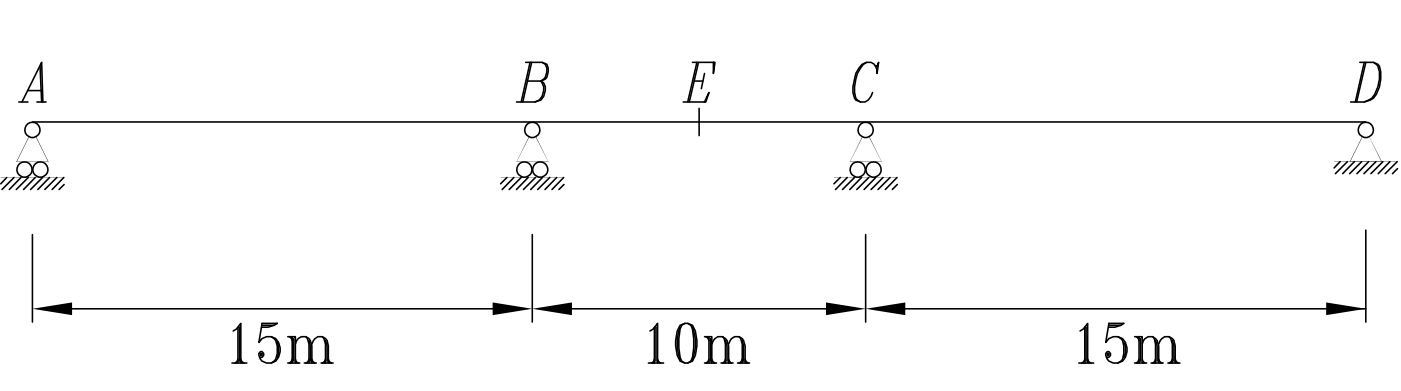

In [3]:
# Coordonnée éléments
XY = np.array([
     [0, 0], # Appui A
     [5, 0],
     [10,0],
     [15,0], # Appui B
     [20,0], # Point E
     [20,0], # Point E (Dupliqué, pour cisaillement)
     [25,0], # Appui C
     [30,0],
     [35,0],
     [40,0], # Appui D
])

In [4]:
#Matrice de rigidité élémentaire en coordonnées locales
# Discretisation de la poutre en 8 element de longeur 5 m
mat_elem_local_1 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 1
mat_elem_local_2 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 2
mat_elem_local_3 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 3
mat_elem_local_4 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 4
mat_elem_local_5 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 5
mat_elem_local_6 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 6
mat_elem_local_7 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 7
mat_elem_local_8 = matrice_elementaire(E, I, A, L) # Matrice de rigidité Element 8

print(mat_elem_local_1)

[[ 0.2    0.     0.    -0.2    0.     0.   ]
 [ 0.     0.096  0.24   0.    -0.096  0.24 ]
 [ 0.     0.24   0.8    0.    -0.24   0.4  ]
 [-0.2    0.     0.     0.2    0.     0.   ]
 [ 0.    -0.096 -0.24   0.     0.096 -0.24 ]
 [ 0.     0.24   0.4    0.    -0.24   0.8  ]]


In [5]:
#Matrice de rotatio
rot_elem_1 = rotation_matrice(0) # Rotation Element 1
rot_elem_2 = rotation_matrice(0) # Rotation Element 2
rot_elem_3 = rotation_matrice(0) # Rotation Element 3
rot_elem_4 = rotation_matrice(0) # Rotation Element 4
rot_elem_5 = rotation_matrice(0) # Rotation Element 5
rot_elem_6 = rotation_matrice(0) # Rotation Element 6
rot_elem_7 = rotation_matrice(0) # Rotation Element 7
rot_elem_8 = rotation_matrice(0) # Rotation Element 8

In [6]:
#Matrice de rigidité élémentaire en coordonnées locales
mat_elem_global_1 = np.matmul(np.matmul(np.transpose(rot_elem_1),mat_elem_local_1), rot_elem_1) # Matrice de rigidité Element 1
mat_elem_global_2 = np.matmul(np.matmul(np.transpose(rot_elem_2),mat_elem_local_2), rot_elem_2) # Matrice de rigidité Element 2
mat_elem_global_3 = np.matmul(np.matmul(np.transpose(rot_elem_3),mat_elem_local_3), rot_elem_3) # Matrice de rigidité Element 3
mat_elem_global_4 = np.matmul(np.matmul(np.transpose(rot_elem_4),mat_elem_local_4), rot_elem_4) # Matrice de rigidité Element 4
mat_elem_global_5 = np.matmul(np.matmul(np.transpose(rot_elem_5),mat_elem_local_5), rot_elem_5) # Matrice de rigidité Element 5
mat_elem_global_6 = np.matmul(np.matmul(np.transpose(rot_elem_6),mat_elem_local_6), rot_elem_6) # Matrice de rigidité Element 6
mat_elem_global_7 = np.matmul(np.matmul(np.transpose(rot_elem_7),mat_elem_local_7), rot_elem_7) # Matrice de rigidité Element 7
mat_elem_global_8 = np.matmul(np.matmul(np.transpose(rot_elem_8),mat_elem_local_8), rot_elem_8) # Matrice de rigidité Element 8



In [7]:
# Connection entre élément
# Degré de liberte de chaque élément de la forme
# LM[:, i] = [Uxi, Uyi, Thetai, Uxj, Uyj, Thetaj]
LM = np.zeros((6, 8), dtype=int)
LM[:,0] = [0, 0, 7, 0, 1, 8]    # Degré de Liberté elémént 1
LM[:,1] = [0, 1, 8, 0, 2, 9]    # Degré de Liberté elémént 2
LM[:,2] = [0, 2, 9, 0, 0, 10]   # Degré de Liberté elémént 3
LM[:,3] = [0, 0, 10, 0, 3, 11]  # Degré de Liberté elémént 4

LM[:,4] = [0, 4, 11, 0, 0, 12]  # Degré de Liberté elémént 6
LM[:,5] = [0, 0, 12, 0, 5, 13]  # Degré de Liberté elémént 7
LM[:,6] = [0, 5, 13, 0, 6, 14]  # Degré de Liberté elémént 8
LM[:,7] = [0, 6, 14, 0, 0, 15]  # Degré de Liberté elémént 8

print(LM)


[[ 0  0  0  0  0  0  0  0]
 [ 0  1  2  0  4  0  5  6]
 [ 7  8  9 10 11 12 13 14]
 [ 0  0  0  0  0  0  0  0]
 [ 1  2  0  3  0  5  6  0]
 [ 8  9 10 11 12 13 14 15]]


In [8]:
# Assemblage de la matrice de rigidité
K_global_2 = np.zeros((15, 15), dtype=np.float32)

K_global_2 = assemblage_matrice_rigidite(LM, 0, K_global_2, mat_elem_global_1)
K_global_2 = assemblage_matrice_rigidite(LM, 1, K_global_2, mat_elem_global_2)
K_global_2 = assemblage_matrice_rigidite(LM, 2, K_global_2, mat_elem_global_3)
K_global_2 = assemblage_matrice_rigidite(LM, 3, K_global_2, mat_elem_global_4)
K_global_2 = assemblage_matrice_rigidite(LM, 4, K_global_2, mat_elem_global_5)
K_global_2 = assemblage_matrice_rigidite(LM, 5, K_global_2, mat_elem_global_6)
K_global_2 = assemblage_matrice_rigidite(LM, 6, K_global_2, mat_elem_global_7)
K_global_2 = assemblage_matrice_rigidite(LM, 7, K_global_2, mat_elem_global_8)

np.linalg.inv(K_global_2)

array([[ 4.93826790e+01,  4.08950233e+01, -3.47221680e+01,
         2.08332882e+01, -7.71602917e+00, -6.17282248e+00,
         1.24999914e+01,  4.62962484e+00, -6.48147726e+00,
        -8.33332253e+00, -5.55554485e+00, -2.77777100e+00,
        -4.62961435e-01,  9.25923467e-01,  1.38888490e+00],
       [ 4.08950233e+01,  4.59104538e+01, -4.34027138e+01,
         2.60416126e+01, -9.64503765e+00, -7.71602917e+00,
         9.37499142e+00,  5.78703165e+00, -4.97684765e+00,
        -1.04166546e+01, -6.94443178e+00, -3.47221398e+00,
        -5.78701854e-01,  1.15740442e+00,  1.73610640e+00],
       [-3.47221680e+01, -4.34027138e+01,  9.63540497e+01,
        -7.03123932e+01,  2.60416145e+01,  2.08332882e+01,
        -7.81248713e+00, -5.20832539e+00,  2.60416150e+00,
         1.56249800e+01,  1.87499752e+01,  9.37498283e+00,
         1.56249583e+00, -3.12499356e+00, -4.68748951e+00],
       [ 2.08332882e+01,  2.60416126e+01, -7.03123932e+01,
         9.63540497e+01, -4.34027176e+01, -3.47221680

In [9]:
#Vecteur de Force Nodale
P_global    = np.zeros(15)
P_global[2] = -1
P_global[3] = 1
print(P_global)

[ 0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [10]:
#Solution 
U = np.linalg.solve(K_global_2, P_global)
print(U)

[  55.55545637   69.44432865 -166.66644089  166.66644182  -69.44432948
  -55.55545647   12.49997685    8.33331888   -4.16665749  -24.99996243
  -37.49994924  -24.9999628    -4.16665706    8.33331932   12.49997666]


In [11]:
# Line d'Influence Muller-Breslaut
V1 = U[2]
V2 = U[3]


LI  = U/(abs(V1) + abs(V2)) #changer le signe de V2 pour une somme en valeur absolue
print(LI)


[ 0.16666659  0.20833327 -0.5         0.5        -0.20833327 -0.16666659
  0.03749998  0.02499999 -0.01249999 -0.07499999 -0.1125     -0.07499999
 -0.01249999  0.02499999  0.03749998]


Ordonnée de la Ligne d'Influence : 
 [ 0.          0.16666659  0.20833327  0.         -0.5         0.5
  0.         -0.20833327 -0.16666659  0.        ]


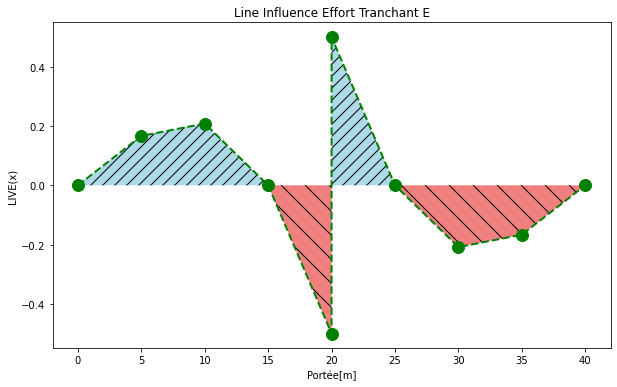

In [13]:
# Tracée ligne Influence
# Create the scatter plot
scale_factor = 1
x = scale_factor*XY[:, 0]

y = np.zeros((10,))
# Noeud 0
y[0]   = 0
# Noeud 1, 2
y[1:3] = LI[0:2] #(0, 1)
# Noeud 3 : Reaction appui, valeur deplacement vertical 0 
y[3]   = 0 
# Noeud 4,5 : Point E
y[4:6] = LI[2:4] #(2, 3)
y[6] = 0
# Noeud 5, 6
y[7:9] = LI[4:6] #(4, 5)
# Noeud 7 reaction appui 0
y[9] = 0

print("Ordonnée de la Ligne d'Influence : \n",y)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'go--', linewidth=2, markersize=12)
# Fill the area above the line with a hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y >= 0), facecolor='lightblue', hatch='//')

# Fill the area below the line with a different hashed pattern
plt.fill_between(x, y, np.zeros_like(y), where=(y <= 0),  facecolor='lightcoral', hatch='\\')

# Add labels and title
plt.xlabel("Portée[m]")
plt.ylabel("LIVE(x)")
plt.title("Line Influence Effort Tranchant E")

# Show the plot
plt.show()